In [11]:
%load_ext autoreload
%autoreload 2

import scipy.stats as stats
import scipy.optimize as opt
import util.data_manipulation as dm
import numpy as np
import behaviour_fitting.likelihood as L
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
%store

Stored variables and their in-db values:
rw_results_no_value_reset             -> {'A3.6b':      fun: 1281.1726193980517
 message: '
rw_results_reset                      -> {'A3.5a':      fun: 1073.3240315073035
 message: '


In [105]:
# Load all behaviour data

jc04 = dm.load_all_sessions(4)

Loading new data files..
Importing data file: A3.5a-2021-11-05-155705.txt
Importing data file: A3.5a-2021-11-06-151819.txt
Importing data file: A3.5a-2021-11-08-174841.txt
Importing data file: A3.5a-2021-11-09-172401.txt
Importing data file: A3.5a-2021-11-10-180400.txt
Importing data file: A3.5a-2021-11-11-151331.txt
Importing data file: A3.5a-2021-11-13-134329.txt
Importing data file: A3.5a-2021-11-15-181016.txt
Importing data file: A3.5a-2021-11-16-182120.txt
Importing data file: A3.5a-2021-11-18-181142.txt
Importing data file: A3.5a-2021-11-20-150744.txt
Importing data file: A3.5a-2021-11-21-141756.txt
Importing data file: A3.5a-2021-11-22-174403.txt
Importing data file: A3.5a-2021-11-23-174115.txt
Importing data file: A3.5a-2021-11-24-165031.txt
Importing data file: A3.5a-2021-11-25-150227.txt
Importing data file: A3.5a-2021-11-26-150258.txt
Importing data file: A3.5a-2021-11-28-130705.txt
Importing data file: A3.5a-2021-11-29-174925.txt
Importing data file: A3.5a-2021-11-30-190518

## Fitting R-W model to single subjects

Learning rule:
$$
\delta[t] = r[t] - Q_{\text{chosen}}[t], \\
Q[t+1] = Q[t] + \alpha\delta[t].
$$
Choice probabilities:
$$
T_i = Q_i + \mathcal{N}(0, e^2),\\
p(\text{Choose }1) = p(T_1>T_2) = \Phi\left( \dfrac{Q_1 - Q_2}{\sqrt{2e^2}} \right).
$$

In [4]:
# Get all sessions of one example subject

sessions_a35a = jc04.get_sessions(subject_IDs=['A3.5a'])


Trying a bunch of different global optimisers here. Fitting for learning rate ($\alpha$) and noise ($e$) for each subject; initial values set to average of three reward probabilities ($0.57$). 

In [12]:
L_rw = lambda params: L.rw(sessions_a35a[:], 0.57, *params)[0]

basin = opt.basinhopping(L_rw, [0.15, 0.5])
basin

d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: Runt

                        fun: 1072.5480851181223
 lowest_optimization_result:       fun: 1072.5480851181223
 hess_inv: array([[ 0.00075895, -0.00075895],
       [-0.00075895,  0.00075895]])
      jac: array([0.00010681, 0.00015259])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 178
      nit: 15
     njev: 58
   status: 2
  success: False
        x: array([0.19217559, 0.50216172])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 99
                       nfev: 11393
                        nit: 100
                       njev: 3552
                    success: False
                          x: array([0.19217559, 0.50216172])

In [13]:
L_rw = lambda params: L.rw(sessions_a35a[:], 0.57, *params)[0]

anneal = opt.dual_annealing(L_rw, ((0,1), (0, 10)))
anneal

d:\code\cost_benefit\behaviour_fitting\likelihood.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))
d:\code\cost_benefit\behaviour_fitting\likelihood.py:40: RuntimeWarning: invalid value encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))


     fun: 1072.5480851181323
 message: ['Maximum number of iteration reached']
    nfev: 4064
    nhev: 0
     nit: 1000
    njev: 21
  status: 0
 success: True
       x: array([0.19217551, 0.50216174])

In [14]:
L_rw = lambda params: L.rw(sessions_a35a[:], 0.57, *params)[0]
direct = opt.direct(L_rw, ((0,1), (0, 10)))
direct

     fun: 1072.548092721143
 message: 'Number of function evaluations done is larger than maxfun=2000'
    nfev: 2011
     nit: 154
  status: 1
 success: False
       x: array([0.19227252, 0.50221003])

In [15]:
L_rw = lambda params: L.rw(sessions_a35a[:], 0.57, *params)[0]

diff_evo = opt.differential_evolution(L_rw, ((0,1), (0,10)))
diff_evo

     fun: 1072.5480851183304
     jac: array([-9.09494702e-05, -9.54969432e-04])
 message: 'Optimization terminated successfully.'
    nfev: 267
     nit: 7
 success: True
       x: array([0.19217534, 0.50216123])

Results are similar, but for this model at least, differential evolution is a lot faster than others. Use this to fit for all subjects in JC04:

In [23]:
# Fit R-W for all subjects in a cohort

rw_results_reset = {}

for id in jc04.subject_IDs:

    subject_sessions = jc04.get_sessions(subject_IDs=[id])

    L_rw = lambda params: L.rw(subject_sessions[:], 0.57, *params)[0]
    fit = opt.differential_evolution(L_rw, ((0,1), (0,10)))

    print(id)
    print(fit)

    rw_results_reset[id] = fit

d:\code\cost_benefit\behaviour_fitting\likelihood.py:50: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
d:\code\cost_benefit\behaviour_fitting\likelihood.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))
d:\code\cost_benefit\behaviour_fitting\likelihood.py:40: RuntimeWarning: invalid value encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))


A3.5a
     fun: 1073.3240315073035
 message: 'Optimization terminated successfully.'
    nfev: 276
     nit: 8
 success: True
       x: array([0.17370062, 0.51551177])
D4.4c
     fun: 1599.3663548120303
 message: 'Optimization terminated successfully.'
    nfev: 396
     nit: 12
 success: True
       x: array([0.11752874, 0.43422954])
D3.3d
     fun: 1648.5178545002252
 message: 'Optimization terminated successfully.'
    nfev: 366
     nit: 11
 success: True
       x: array([0.14433345, 0.51572375])
A3.6d
     fun: 1371.2034862368228
 message: 'Optimization terminated successfully.'
    nfev: 366
     nit: 11
 success: True
       x: array([0.16040211, 0.46967021])
D4.4b
     fun: 824.6429276676034
     jac: array([-0.00165983, -0.00123919])
 message: 'Optimization terminated successfully.'
    nfev: 204
     nit: 5
 success: True
       x: array([0.26011352, 0.88685997])
D3.5b
     fun: 1301.5853903577195
 message: 'Optimization terminated successfully.'
    nfev: 306
     nit: 9
 su

**Update: $Q$ not reset at the beginning of each session.**

In [75]:
rw_results_no_value_reset = {}

for id in jc04.subject_IDs:

    subject_sessions = jc04.get_sessions(subject_IDs=[id])

    L_rw = lambda params: L.rw(subject_sessions[:], 0.57, *params)[0]
    fit = opt.differential_evolution(L_rw, ((0,1), (0,10)))

    print(id)
    print(fit)

    rw_results_no_value_reset[id] = fit

d:\code\cost_benefit\behaviour_fitting\likelihood.py:52: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)
d:\code\cost_benefit\behaviour_fitting\likelihood.py:42: RuntimeWarning: invalid value encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))
d:\code\cost_benefit\behaviour_fitting\likelihood.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  p = stats.norm.cdf((2 * Q[str(td['proba_choosed'][t])] - Q[str(td['prob_high'][t])] - Q[str(td['prob_low'][t])])/(2**0.5 * e))


A3.6b
     fun: 1281.1726193980517
 message: 'Optimization terminated successfully.'
    nfev: 396
     nit: 12
 success: True
       x: array([0.0512186, 0.4163299])
D4.4b
     fun: 815.3188014934278
 message: 'Optimization terminated successfully.'
    nfev: 186
     nit: 5
 success: True
       x: array([0.10939797, 0.90689131])
D3.5d
     fun: 699.6468692971827
 message: 'Optimization terminated successfully.'
    nfev: 366
     nit: 11
 success: True
       x: array([0.0527164 , 0.27180279])
D3.5b
     fun: 1224.8973161103565
     jac: array([0.00027285, 0.0007276 ])
 message: 'Optimization terminated successfully.'
    nfev: 324
     nit: 9
 success: True
       x: array([0.08875835, 0.48258977])
D4.4g
     fun: 1192.8836876491127
     jac: array([0.00031832, 0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 447
     nit: 13
 success: True
       x: array([0.03520526, 0.36945652])
D3.3b
     fun: 1325.5065070729934
 message: 'Optimization terminated success

**Update: values fixed to poke positions rather than reward probabilities.**

In [106]:
rw_results_no_reset = {}

for id in jc04.subject_IDs:

    subject_sessions = jc04.get_sessions(subject_IDs=[id])

    L_rw = lambda params: L.rw(subject_sessions[:], 0.57, *params)[0]
    fit = opt.differential_evolution(L_rw, ((0,1), (0,10)))

    print(id)
    print(fit)

    rw_results_no_reset[id] = fit

d:\code\cost_benefit\behaviour_fitting\likelihood.py:53: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)


A3.6b
     fun: 1181.9027232671551
     jac: array([-0.00077307,  0.00034106])
 message: 'Optimization terminated successfully.'
    nfev: 531
     nit: 16
 success: True
       x: array([0.01180234, 0.32428846])
D4.4b
     fun: 511.9252630949672
     jac: array([ 1.75945729, -0.00347882])
 message: 'Optimization terminated successfully.'
    nfev: 1011
     nit: 31
 success: True
       x: array([0.00077093, 0.0487817 ])
D3.5d
     fun: 692.1633077088547
     jac: array([-5.68434189e-05, -2.61479727e-04])
 message: 'Optimization terminated successfully.'
    nfev: 474
     nit: 14
 success: True
       x: array([0.04510684, 0.2613711 ])


d:\code\cost_benefit\behaviour_fitting\likelihood.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  p = stats.norm.cdf((2 * Q[td['choices'][t]-1] - Q[contingencies.index(str(td['prob_high'][t]))] - Q[contingencies.index(str(td['prob_low'][t]))])/(2**0.5 * e))
d:\code\cost_benefit\behaviour_fitting\likelihood.py:43: RuntimeWarning: invalid value encountered in double_scalars
  p = stats.norm.cdf((2 * Q[td['choices'][t]-1] - Q[contingencies.index(str(td['prob_high'][t]))] - Q[contingencies.index(str(td['prob_low'][t]))])/(2**0.5 * e))


D3.5b
     fun: 1181.4811066900315
 message: 'Optimization terminated successfully.'
    nfev: 336
     nit: 10
 success: True
       x: array([0.03172363, 0.42327103])
D4.4g
     fun: 1074.5510355835568
     jac: array([9.73159331e-03, 2.27373676e-05])
 message: 'Optimization terminated successfully.'
    nfev: 504
     nit: 15
 success: True
       x: array([0.01116372, 0.29185946])
D3.3b
     fun: 1270.6609727596847
 message: 'Optimization terminated successfully.'
    nfev: 396
     nit: 12
 success: True
       x: array([0.01786978, 0.31765235])
A3.6a
     fun: 864.0311364421121
 message: 'Optimization terminated successfully.'
    nfev: 456
     nit: 14
 success: True
       x: array([0.04299907, 0.27919568])
D4.4c
     fun: 1507.3237919752441
     jac: array([-0.00052296,  0.00052296])
 message: 'Optimization terminated successfully.'
    nfev: 417
     nit: 12
 success: True
       x: array([0.0237942 , 0.39958087])
A3.5a
     fun: 919.9332246652518
     jac: array([-0.00427463

In [84]:
%store -r rw_results_no_value_reset
rw_results_no_value_reset

{'A3.6b':      fun: 1281.1726193980517
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 12
  success: True
        x: array([0.0512186, 0.4163299]),
 'D4.4b':      fun: 815.3188014934278
  message: 'Optimization terminated successfully.'
     nfev: 186
      nit: 5
  success: True
        x: array([0.10939797, 0.90689131]),
 'D3.5d':      fun: 699.6468692971827
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 11
  success: True
        x: array([0.0527164 , 0.27180279]),
 'D3.5b':      fun: 1224.8973161103565
      jac: array([0.00027285, 0.0007276 ])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 9
  success: True
        x: array([0.08875835, 0.48258977]),
 'D4.4g':      fun: 1192.8836876491127
      jac: array([0.00031832, 0.        ])
  message: 'Optimization terminated successfully.'
     nfev: 447
      nit: 13
  success: True
        x: array([0.03520526, 0.36945652]),
 'D3.3b':      fun: 1325.

In [85]:
rw_results_reset

{'A3.5a':      fun: 1073.3240315073035
  message: 'Optimization terminated successfully.'
     nfev: 276
      nit: 8
  success: True
        x: array([0.17370062, 0.51551177]),
 'D4.4c':      fun: 1599.3663548120303
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 12
  success: True
        x: array([0.11752874, 0.43422954]),
 'D3.3d':      fun: 1648.5178545002252
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 11
  success: True
        x: array([0.14433345, 0.51572375]),
 'A3.6d':      fun: 1371.2034862368228
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 11
  success: True
        x: array([0.16040211, 0.46967021]),
 'D4.4b':      fun: 824.6429276676034
      jac: array([-0.00165983, -0.00123919])
  message: 'Optimization terminated successfully.'
     nfev: 204
      nit: 5
  success: True
        x: array([0.26011352, 0.88685997]),
 'D3.5b':      fun: 1301.5853903577195
  message: 'Optimization

Resulting best fitting parameters look reasonable.

An example of choice probabilities predicted by R-W model over a session (forced trials excluded):

In [107]:
subject_id = 'D4.4b'
session_num = 2 # Example session

subject_sessions = jc04.get_sessions(subject_IDs=[subject_id])

latents = L.rw(subject_sessions, 0.57, *rw_results_no_reset[subject_id].x)

trials_forced = []
trials_high_low = []
trials_high_mid = []
trials_mid_low = []

choice_probs_high_low = []
choice_probs_high_mid = []
choice_probs_mid_low = []

for t in range(len(latents[2][session_num])): # Separate lists for different types of trials

    if subject_sessions[session_num].trial_data['free_choice'][t] == False:

        trials_forced.append(t)

    elif float(subject_sessions[session_num].trial_data['prob_high'][t]) > 0.9: 

        if float(subject_sessions[session_num].trial_data['prob_low'][t]) > 0.3:

            trials_high_mid.append(t)
            choice_probs_high_mid.append(latents[2][session_num][t])

        else:

            trials_high_low.append(t)
            choice_probs_high_low.append(latents[2][session_num][t])

    else:

        trials_mid_low.append(t)
        choice_probs_mid_low.append(latents[2][session_num][t])


plt.plot(trials_high_low, choice_probs_high_low, 'x', label='High-low')
plt.plot(trials_high_mid, choice_probs_high_mid, 'x', label='High-mid')
plt.plot(trials_mid_low, choice_probs_mid_low, 'x', label='Mid-low')
plt.plot([0, len(latents[2][session_num])], [0.5, 0.5], '--')
plt.xlabel('Trial #')
plt.ylabel('Choice probability from R-W model')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=8, ncol=3, borderaxespad=0.)

TypeError: '>' not supported between instances of 'str' and 'float'

T-test on whether the model predicts actions better than chance, and proportions of trials (among free choice trials) that the optimal action predicted by model was chosen.

In [49]:
prop_good_choices_all = {}
pvalues_better_than_chance = {}

for id in jc04.subject_IDs:

    latents = L.rw(jc04.get_sessions(subject_IDs=[id]), 0.57, *rw_results[id].x)

    good = 0
    bad = 0

    for probs in latents[2]: # choice probabilities in each session

        good += ((np.array(probs) < 1) & (np.array(probs) > 0.5)).sum()
        bad += (np.array(probs) < 0.5).sum()

    proportion_good_choices = good / (good + bad)

    pvalue = stats.ttest_1samp(np.array(probs)[(np.array(probs) < 1)], 0.5, alternative="greater").pvalue # t-test for model predicting action better than chance

    pvalues_better_than_chance[id] = pvalue

    prop_good_choices_all[id] = proportion_good_choices


print(pvalues_better_than_chance)    
print(prop_good_choices_all)

{'A3.6b': 0.012184295124338098, 'D4.4b': 0.015019162929388019, 'D3.5d': 6.728944223708297e-33, 'D3.5b': 3.1112296383810945e-17, 'D4.4g': 7.544535122186854e-08, 'D3.3b': 0.02219961754732329, 'A3.6a': 8.86142941197772e-16, 'D4.4c': 1.3915956250421405e-05, 'A3.5a': 1.082717912189746e-07, 'A3.6d': 1.2510052182446202e-29, 'D3.3d': 4.616098209319077e-47}
{'A3.6b': 0.8112115732368896, 'D4.4b': 0.6656441717791411, 'D3.5d': 0.895772289660946, 'D3.5b': 0.7457556935817805, 'D4.4g': 0.829041487839771, 'D3.3b': 0.834733893557423, 'A3.6a': 0.873218304576144, 'D4.4c': 0.7939526184538653, 'A3.5a': 0.7671641791044777, 'A3.6d': 0.7969561989606533, 'D3.3d': 0.7724570673712021}


For all subjects in JC04, the model predicts choices significantly better than chance ($p<0.05$).

Text(0, 0.5, "Proportion of 'good' choices")

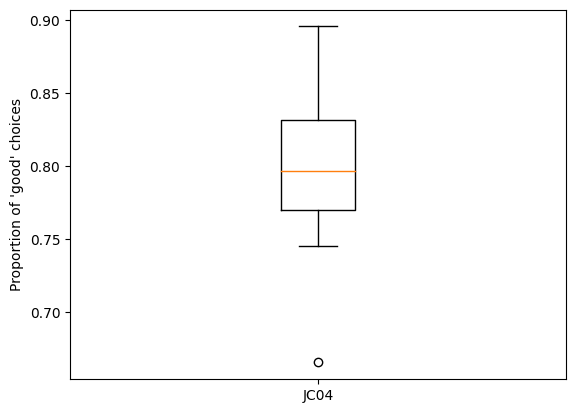

In [72]:
plt.boxplot(prop_good_choices_all.values(), labels=['JC04'])
plt.ylabel('Proportion of \'good\' choices')

In [103]:
subject_sessions = jc04.get_sessions(subject_IDs=['A3.5a'])
subject_sessions[0].store_probas

['0.2', '1', '0.5']

In [91]:
[0.2, 0.5, 1].index(0.2)

0